In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os.path
from skimage.io import imread
from skimage.color import rgb2hsv
from skimage.measure import regionprops, perimeter

Rode a célula abaixo (mude para "Code", por enquanto está "Raw") para capturar imagens.

# Projeto: Pedra-Papel-Tesoura

Neste projeto vocês devem construir um sistema que captura uma imagem da camera e diz se a imagem representa uma jogada de pedra, papel ou tesoura.

Projeto em duplas.

Entregável: Jupyter Notebook com a demonstração do sistema funcionando, e arquivo '.joblib' com o modelo treinado.

Entrega: 9/10, 23:59

Rubrica:

- I - Não entregou ou entregou nonsense.
- C - Funciona, mas com bugs menores.
- A - Funciona bem.

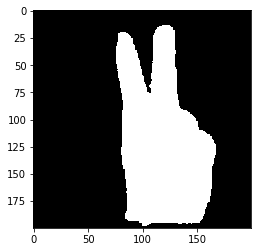

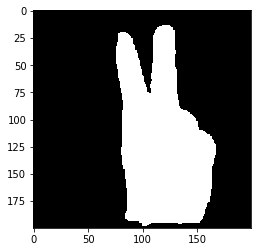

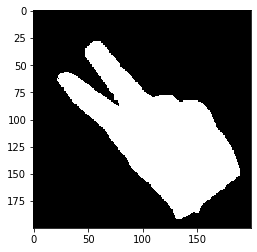

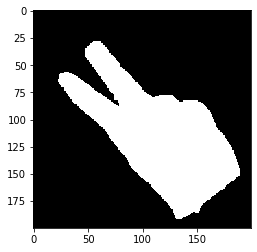

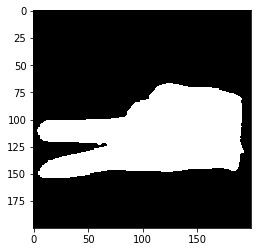

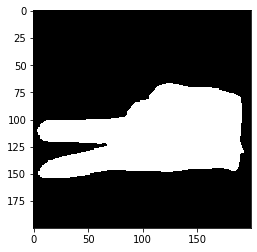

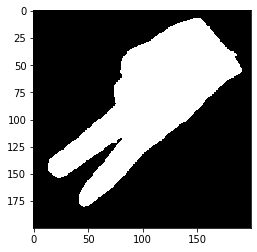

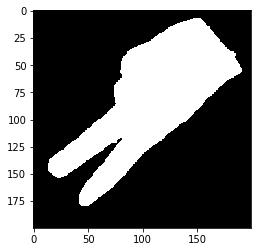

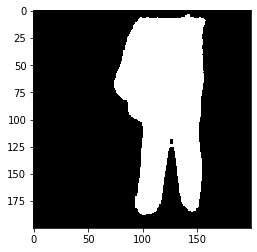

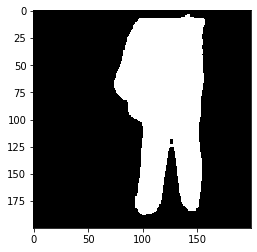

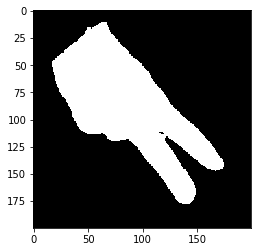

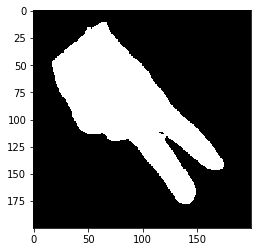

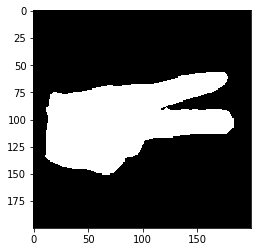

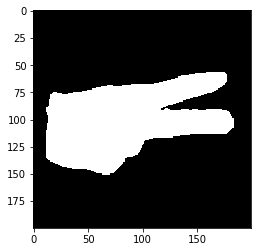

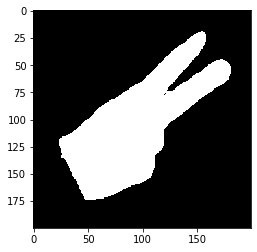

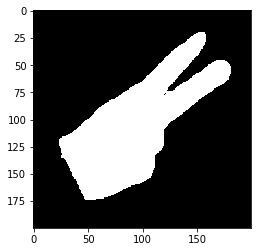

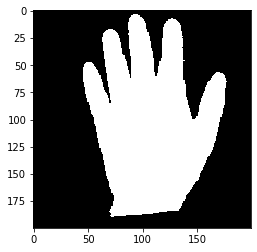

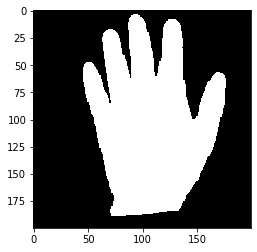

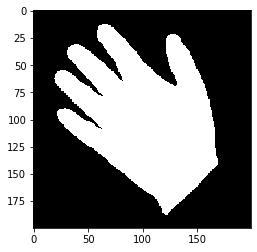

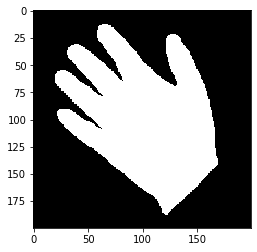

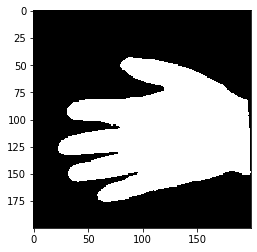

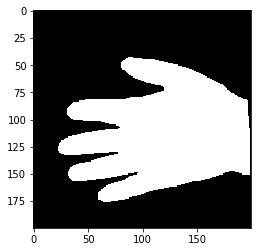

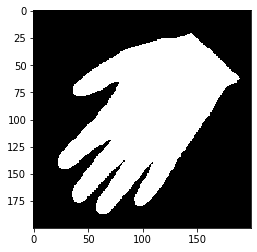

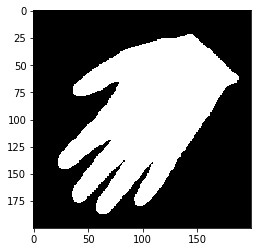

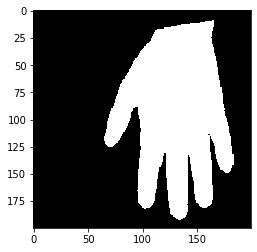

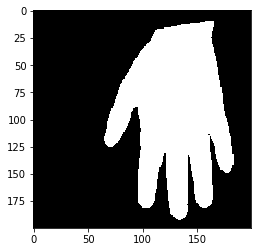

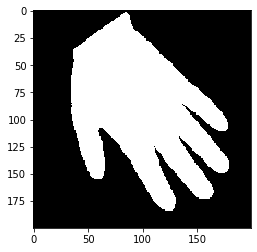

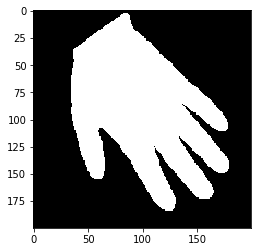

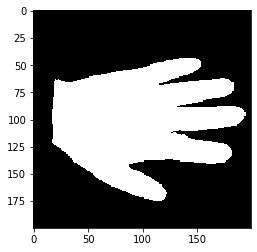

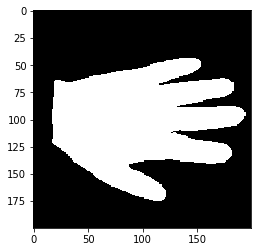

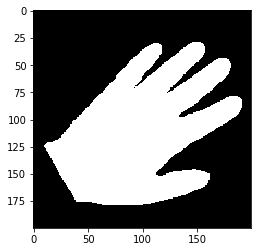

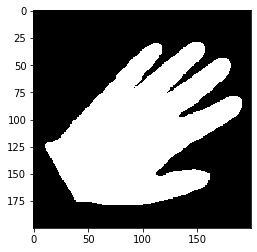

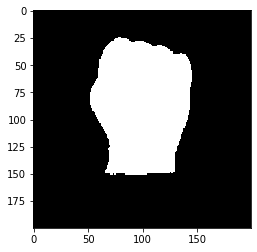

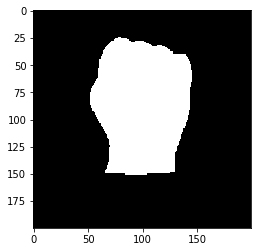

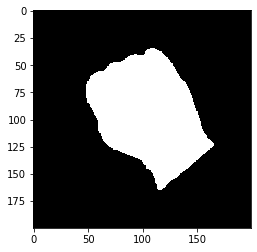

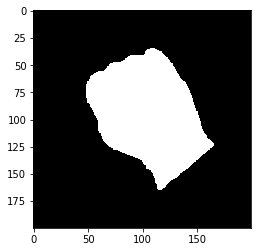

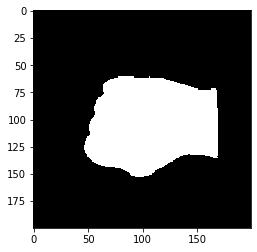

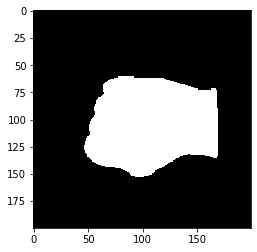

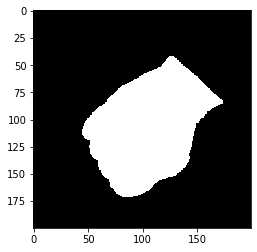

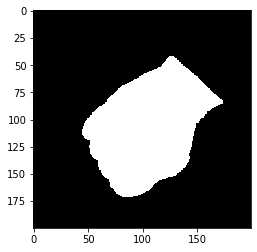

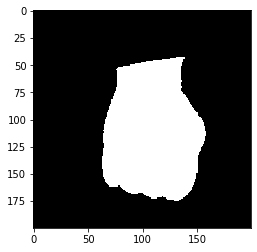

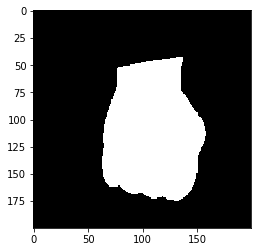

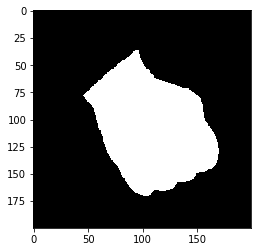

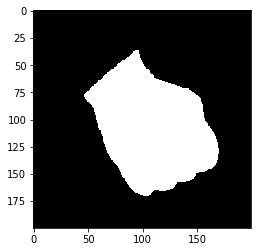

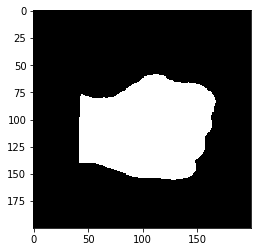

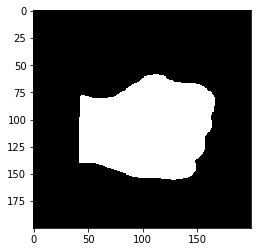

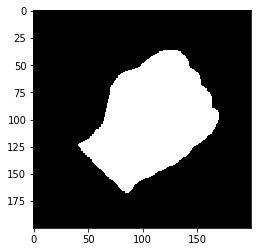

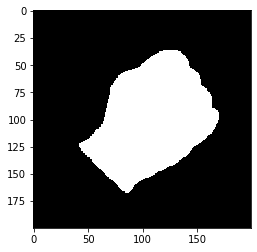

In [4]:
i = 0
for filename in os.listdir("Data"):
    img = rgb2hsv(imread("Data/" + filename))
    imgh = img[:,:,0]
    imgh = (imgh > 0.5) & (imgh < 0.8)

    imgs = img[:,:,1]
    imgs = (imgs > 0.3)

    imga = imgh & imgs
    centro = imga[140:340,220:420]
    plt.imshow(centro, cmap="gray")
    plt.show()
    
    string = "Train/new_" + str(i) + ".png" 
    cv2.imwrite(string, (centro*255).astype('uint8'))
    
    i += 1

In [12]:
X = []

for filename in os.listdir("Train"):
    img = imread("Train/"+filename, as_gray=True)
    props = regionprops(img)[0]
    eccentricity = props['eccentricity']
    hu_moments = props['moments_hu']
    area = props['area']
    perimeter = props['perimeter']
    if perimeter == 0.0:
        perimeter = 1.0
    compactness = 4.0*np.pi*area/perimeter
    feats = [eccentricity, compactness] + list(hu_moments)
    X.append(feats)
print(X)

[[0.897952721674437, 227.13655447922747, 0.24395143643364586, 0.027154646106107523, 0.0017698171350949703, 0.0007931285176720127, 9.395733736624388e-07, 0.00013051041810612895, -1.4092541554480097e-08], [0.8935228799668764, 225.02994749856092, 0.2404342065653412, 0.025520148177096198, 0.0017295609053201823, 0.0007390984312324706, 8.356161508635679e-07, 0.00011786685510469781, -6.834371195787526e-09], [0.7321559750165993, 211.49126179562177, 0.1904175733491933, 0.00486157976270238, 0.0002753048538477056, 3.652922850475126e-05, 2.0706917627478725e-09, 2.515665074464814e-06, -3.0218712365839825e-09], [0.7942717415226178, 202.8589890096781, 0.19930435058094476, 0.008433718629789567, 0.00031116266525484343, 5.184883461632606e-05, 5.657719280352454e-09, 4.39994877607507e-06, -3.3707145218246303e-09], [0.7987751376681134, 188.5952202392434, 0.20202843690617434, 0.008957680212174775, 0.00022319318230254356, 3.3996520503124865e-05, 1.8336913684526853e-09, 2.9547478859771052e-06, -2.325353269798